### Este script es una red neuronal que predice datos para agujeros negros

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
os.chdir('/Users/benx/Documents/PythonCodes/AstronomicalData/')


In [2]:
#bh_names=['redshift', 'masa', 'radio', 'log_masa', 'log_radio']
bh_df= pd.read_csv('bh_data.csv', sep=',')#, names=bh_names)


In [3]:
bh_df.head() #Visualizamos los primeros 10 

,redshift,masa,radio,log_masa,log_radio
0,0.250245,43.738536,2.904520e-09,3.778230,-19.656998
1,0.060677,17.091587,3.811566e-09,2.838586,-19.385226
2,0.272697,90.614288,5.649910e-09,4.506612,-18.991626
3,0.475640,35.495746,1.543438e-09,3.569413,-20.289254
4,0.145282,98.296097,1.006310e-08,4.587984,-18.414391


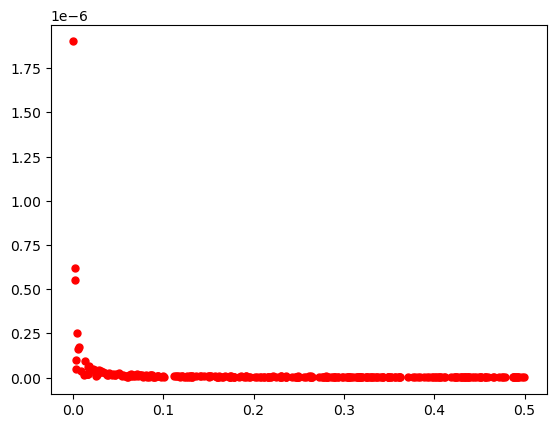

In [4]:
shadows = plt.scatter(bh_df['redshift'],bh_df['radio'],  c = 'red', s = 25, label='shadows')

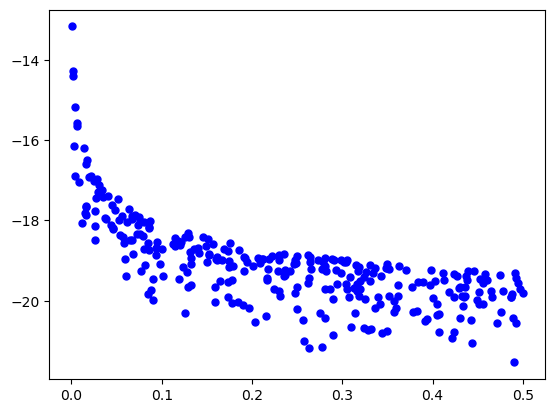

In [5]:
shadows_log_ax = plt.scatter(bh_df['redshift'],bh_df['log_radio'],  c = 'blue', s = 25, label='shadows')


Coeficiente: [-5.5424704]
Intercepto: -17.79354879157896


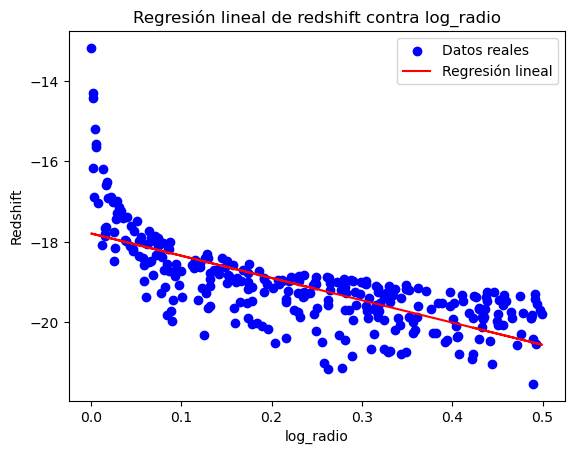

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df = pd.DataFrame(bh_df)

# Realizar la regresión lineal
X = df[['redshift']] #la doble llave transforma la columna en un dataframe, en lugar de una serie!
y = df['log_radio'] #por otra parte, 'y' si puede ser una serie unidimensional

model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes de la regresión
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

# Predecir los valores de redshift basados en log_radio
predicted_radio = model.predict(X)

# Graficar los datos y la regresión
plt.scatter( df['redshift'],df['log_radio'], color='blue', label='Datos reales')
plt.plot( df['redshift'],predicted_radio, color='red', label='Regresión lineal')
plt.xlabel('log_radio')
plt.ylabel('Redshift')
plt.title('Regresión lineal de redshift contra log_radio')
plt.legend()
plt.show()


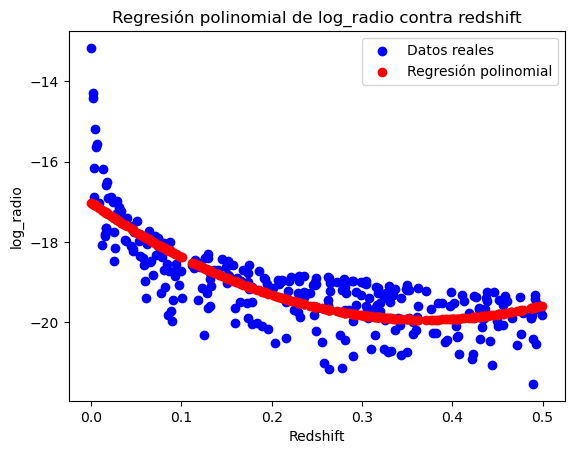

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Definir las variables predictoras y la variable objetivo
X_input = df[['redshift']]
y_input = df['log_radio']

# Crear instancias de PolynomialFeatures para transformar las características
poly_features = PolynomialFeatures(degree=2)  # Cambia el grado según sea necesario
X_poly = poly_features.fit_transform(X_input)

# Crear una instancia de LinearRegression para el modelo
model = LinearRegression()

# Entrenar el modelo usando las características polinomiales
model.fit(X_poly, y_input)

# Predecir los valores de log_radio utilizando el modelo entrenado
y_pred = model.predict(X_poly)

# Graficar los datos y la regresión polinomial
plt.scatter(X_input, y_input, color='blue', label='Datos reales')
plt.scatter(X_input, y_pred, color='red', label='Regresión polinomial')
plt.xlabel('Redshift')
plt.ylabel('log_radio')
plt.title('Regresión polinomial de log_radio contra redshift')
plt.legend()
plt.show()


Loss en los datos de prueba: 0.32191500067710876
10/10 [==============================] - 0s 427us/step


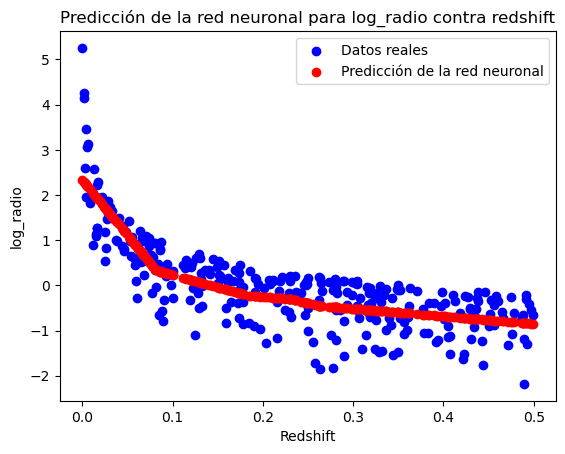

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



# Definir las variables predictoras y la variable objetivo
X = df[['redshift']]
y = df['log_radio']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Construir el modelo de red neuronal
model_0 = Sequential()
model_0.add(Dense(10, input_dim=1, activation='relu'))
model_0.add(Dense(1, activation='linear'))

# Compilar el modelo
model_0.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history_0 = model_0.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Evaluar el modelo en los datos de prueba
loss_0 = model_0.evaluate(X_test, y_test, verbose=0)
print(f'Loss en los datos de prueba: {loss}')

# Predecir los valores de log_radio utilizando el modelo entrenado
y_pred_0 = model_0.predict(X_scaled)

# Graficar los datos y la predicción de la red neuronal
plt.scatter(X, y_scaled, color='blue', label='Datos reales')
plt.scatter(X, y_pred_0, color='red', label='Predicción de la red neuronal')
plt.xlabel('Redshift')
plt.ylabel('log_radio')
plt.title('Predicción de la red neuronal para log_radio contra redshift')
plt.legend()
plt.show()


Epoch 1/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.8952 - val_loss: 0.9040
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8692 - val_loss: 0.8820
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8488 - val_loss: 0.8632
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8350 - val_loss: 0.8479
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8182 - val_loss: 0.8370
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8082 - val_loss: 0.8281
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.8007 - val_loss: 0.8203
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7928 - val_loss: 0.8135
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7866 - val_loss: 0.8070
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7797 - val_loss: 0.8009
Epoch 11/1000
6/6 

Epoch 84/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2258 - val_loss: 0.2738
Epoch 85/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2241 - val_loss: 0.2723
Epoch 86/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2222 - val_loss: 0.2708
Epoch 87/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2207 - val_loss: 0.2695
Epoch 88/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2192 - val_loss: 0.2683
Epoch 89/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2181 - val_loss: 0.2672
Epoch 90/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2167 - val_loss: 0.2661
Epoch 91/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2154 - val_loss: 0.2652
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2144 - val_loss: 0.2642
Epoch 93/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2135 - val_loss: 0.2634
Epoch 94/1

6/6 [==============================] - 0s 2ms/step - loss: 0.1864 - val_loss: 0.2310
Epoch 167/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1862 - val_loss: 0.2307
Epoch 168/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1860 - val_loss: 0.2304
Epoch 169/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1858 - val_loss: 0.2301
Epoch 170/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1854 - val_loss: 0.2296
Epoch 171/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1853 - val_loss: 0.2293
Epoch 172/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1850 - val_loss: 0.2290
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1850 - val_loss: 0.2287
Epoch 174/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1842 - val_loss: 0.2283
Epoch 175/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1842 - val_loss: 0.2279
Epoch 176/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.1629 - val_loss: 0.2006
Epoch 249/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1626 - val_loss: 0.2002
Epoch 250/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1623 - val_loss: 0.1998
Epoch 251/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1620 - val_loss: 0.1996
Epoch 252/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1616 - val_loss: 0.1992
Epoch 253/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1614 - val_loss: 0.1987
Epoch 254/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1611 - val_loss: 0.1983
Epoch 255/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1607 - val_loss: 0.1978
Epoch 256/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1604 - val_loss: 0.1975
Epoch 257/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.1972
Epoch 258/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1664
Epoch 331/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1658
Epoch 332/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1654
Epoch 333/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1354 - val_loss: 0.1650
Epoch 334/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1646
Epoch 335/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1642
Epoch 336/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1638
Epoch 337/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1636
Epoch 338/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1631
Epoch 339/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1336 - val_loss: 0.1624
Epoch 340/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.1328
Epoch 413/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1101 - val_loss: 0.1325
Epoch 414/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1098 - val_loss: 0.1320
Epoch 415/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.1315
Epoch 416/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1092 - val_loss: 0.1312
Epoch 417/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1089 - val_loss: 0.1310
Epoch 418/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1089 - val_loss: 0.1304
Epoch 419/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1086 - val_loss: 0.1299
Epoch 420/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1081 - val_loss: 0.1295
Epoch 421/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1077 - val_loss: 0.1293
Epoch 422/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0907 - val_loss: 0.1063
Epoch 495/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0905 - val_loss: 0.1061
Epoch 496/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0904 - val_loss: 0.1058
Epoch 497/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0901 - val_loss: 0.1055
Epoch 498/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0901 - val_loss: 0.1052
Epoch 499/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0899 - val_loss: 0.1046
Epoch 500/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0897 - val_loss: 0.1043
Epoch 501/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0895 - val_loss: 0.1044
Epoch 502/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0893 - val_loss: 0.1044
Epoch 503/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0892 - val_loss: 0.1043
Epoch 504/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0779 - val_loss: 0.0881
Epoch 577/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0782 - val_loss: 0.0875
Epoch 578/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0779 - val_loss: 0.0874
Epoch 579/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0778 - val_loss: 0.0878
Epoch 580/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0776 - val_loss: 0.0877
Epoch 581/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0775 - val_loss: 0.0872
Epoch 582/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0775 - val_loss: 0.0871
Epoch 583/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0772 - val_loss: 0.0868
Epoch 584/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0773 - val_loss: 0.0863
Epoch 585/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0770 - val_loss: 0.0862
Epoch 586/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0700 - val_loss: 0.0761
Epoch 659/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0700 - val_loss: 0.0761
Epoch 660/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0700 - val_loss: 0.0756
Epoch 661/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0699 - val_loss: 0.0755
Epoch 662/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0696 - val_loss: 0.0757
Epoch 663/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0699 - val_loss: 0.0761
Epoch 664/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0695 - val_loss: 0.0755
Epoch 665/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0752
Epoch 666/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0693 - val_loss: 0.0752
Epoch 667/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0698 - val_loss: 0.0746
Epoch 668/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0645 - val_loss: 0.0679
Epoch 741/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0642 - val_loss: 0.0673
Epoch 742/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0672
Epoch 743/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0672
Epoch 744/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0639 - val_loss: 0.0673
Epoch 745/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0640 - val_loss: 0.0675
Epoch 746/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0639 - val_loss: 0.0668
Epoch 747/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0638 - val_loss: 0.0670
Epoch 748/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0667
Epoch 749/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0670
Epoch 750/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0608
Epoch 823/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0607
Epoch 824/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0605
Epoch 825/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0606
Epoch 826/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0603
Epoch 827/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0612
Epoch 828/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0609
Epoch 829/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0602
Epoch 830/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0609
Epoch 831/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0606
Epoch 832/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0560
Epoch 905/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0554
Epoch 906/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0553
Epoch 907/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0557
Epoch 908/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0554
Epoch 909/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0556
Epoch 910/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0551
Epoch 911/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0554
Epoch 912/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0554
Epoch 913/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0545
Epoch 914/1000


6/6 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0517
Epoch 987/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0509
Epoch 988/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0510
Epoch 989/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0508
Epoch 990/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0513
Epoch 991/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0510
Epoch 992/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0505
Epoch 993/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0506
Epoch 994/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0513
Epoch 995/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0506
Epoch 996/1000


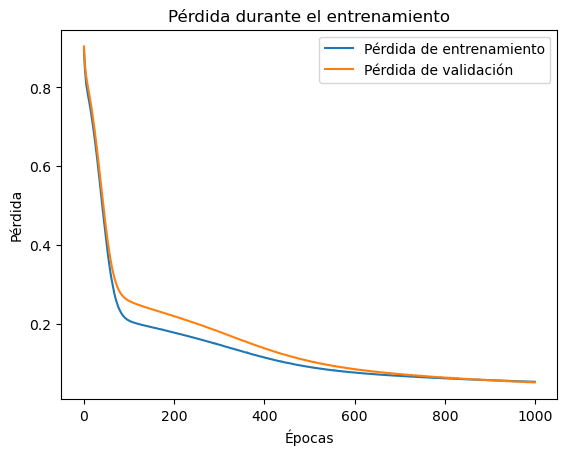

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
os.chdir('/Users/benx/Documents/PythonCodes/AstronomicalData/')

from keras.models import Sequential
from keras.layers import Dense
#bh_names=['redshift', 'masa', 'radio', 'log_masa', 'log_radio']
bh_df= pd.read_csv('bh_data.csv', sep=',')#, names=bh_names)

# Crear un DataFrame con tus datos

df = pd.DataFrame(bh_df)

# Separar las características (variables de entrada) y la variable objetivo
X = df[['redshift', 'log_masa']]
y = df['log_radio']

# Escalar los datos para mejorar el rendimiento de la red neuronal
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()


In [ ]:
y_test

2/2 [==============================] - 0s 1ms/step


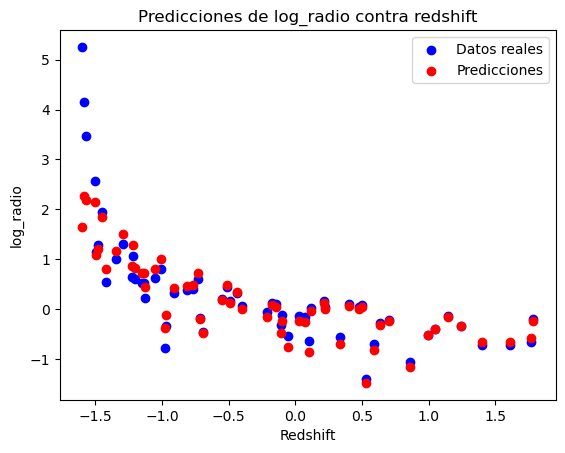

In [2]:
# Realizar predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Graficar los datos de prueba y las predicciones
plt.scatter(X_test[:, 0], y_test, color='blue', label='Datos reales')
plt.scatter(X_test[:, 0], y_pred_scaled, color='red', label='Predicciones')
plt.xlabel('Redshift')
plt.ylabel('log_radio')
plt.title('Predicciones de log_radio contra redshift')
plt.legend()
plt.show()
